## pCMV-Target-ACE 
QUEEN script for pCMV-Target-ACE construction. 
1. A backbone fragment was amplified from pCMV-ABE7.10 using the primer pair RS047/RS052.
2. The C-terminus region of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) using the primer pair RS051/RS046.
3. The two fragments were assembled by Gibson Assembly.

In [1]:
%matplotlib inline

In [3]:
import sys 
sys.path.append("/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Dbrick/github")
from QUEEN.queen import *
set_namespace(globals()) 
if "output" not in os.listdir("./"):
    os.mkdir("output")

<Figure size 72x72 with 0 Axes>

In [4]:
QUEEN(record="https://benchling.com/s/seq-K4HkSd2E8WiTAulJUeBf", dbtype="benchling", product="pCMV_ABE")            #Load pCMV-ABE plasmid object.
QUEEN(record="https://benchling.com/s/seq-cfnGDU0Mq8cUwn185LPF", dbtype="benchling", product="pcDNA31_Target_AID")  #Load pcDNA31_Target_AID plasmid object.

<queen.QUEEN object; project='pcDNA31_Target_AID', length='10419 bp', topology='circular'>

In [5]:
processname1 = "PCR"
description1 = "1. A backbone fragment was amplified from pCMV-ABE7.10 using the primer set RS047/RS052."
QUEEN(seq="ACCTCCTCCACCGTCACCCCCAAGCTGTGACA", product="RS052") #Create a QUEEN object for the forward primer. 
QUEEN("ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC",  product="RS047") #Create a QUEEN object for the reverse primer. 
pCMV_ABE.searchsequence(RS047.seq[-18:], product="FW4", pn=processname1, pd=description1)              #Search for the 18-bp 3’-end sequences of the forward primer.
pCMV_ABE.searchsequence(RS052.seq[-18:], product="RV4", pn=processname1, pd=description1)              #Search for the 18-bp 3’-end sequences of the reverse primer.
f4 = cropdna(pCMV_ABE, FW4[0].end, RV4[0].start, product="extract4", pn=processname1, pd=description1) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract4, RS047.seq, RS052.rcseq, product="fragment4", pn=processname1, pd=description1)    #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment4', length='8695 bp', topology='linear'>

In [6]:
processname2 = "PCR"
description2 = "2. The C-terminus region of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using the primer set RS051/RS046."
QUEEN(seq="TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC", product="RS046") #Create a QUEEN object for the forward primer. 
QUEEN(seq="GCTTGGGGGTGACGGTGGAGGAGGTACCGGCGG", product="RS051")    #Create a QUEEN object for the reverse primer. 
pcDNA31_Target_AID.searchsequence(RS051.seq[-18:], product="FW5", pn=processname2, pd=description2)              #Search for the 18-bp 3’-end sequences of the forward primer.
pcDNA31_Target_AID.searchsequence(RS046.seq[-18:], product="RV5", pn=processname2, pd=description2)              #Search for the 18-bp 3’-end sequences of the reverse primer.
f5 = cropdna(pcDNA31_Target_AID, FW5[0].end, RV5[0].start, product="extract5", pn=processname2, pd=description2) #Crop the internal DNA sequence flanked by the primer annealing sites.
modifyends(extract5, RS051.seq, RS046.rcseq, product="fragment5", pn=processname2, pd=description2)              #Add forward and reverse primer sequences to the both ends of the cropped fragment. 

<queen.QUEEN object; project='fragment5', length='1211 bp', topology='linear'>

In [7]:
processname3 = "Gibson Assembly"
description3 = "3. The two fragments were assembled by Gibson Assembly reaction."
modifyends(fragment4, "*{25}/-{25}","-{25}/*{25}", product="fragment4", pn=processname3, pd=description3)       #Generate long sticky ends on the both sides of "fragment4".
modifyends(fragment5, "*{25}/-{25}","-{25}/*{25}", product="fragment5", pn=processname3, pd=description3)       #Generate long sticky ends on the both sides of "fragment5".
joindna(fragment4, fragment5, topology="circular", product="pCMV_Target_ACE", pn=processname3, pd=description3) #Join the fragments.

<queen.QUEEN object; project='pCMV_Target_ACE', length='9856 bp', topology='circular'>

In [8]:
pCMV_Target_ACE.printfeature()

feature_id  feature_type  qualifier:label     start  end   strand  
0           source        source              0      3450  +       
100         primer_bind   BGH-rev             2      20    -       
200         polyA_signal  bGH poly(A) signal  8      233   +       
300         primer_bind   M13 Reverse         303    320   -       
400         primer_bind   M13/pUC Reverse     316    339   -       
500         protein_bind  lac operator        327    344   +       
600         promoter      lac promoter        351    382   -       
700         protein_bind  CAP binding site    396    418   +       
800         primer_bind   L4440               534    552   -       
900         rep_origin    ori                 705    1294  -       
1000        primer_bind   pBR322ori-F         785    805   -       
1100        CDS           AmpR                1464   2325  -       
1200        primer_bind   Amp-R               2087   2107  +       
1300        promoter      AmpR promoter       23

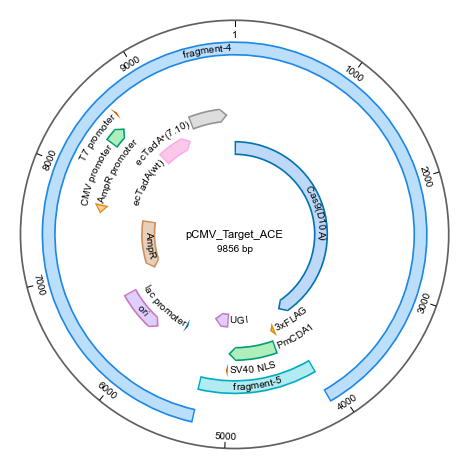

In [9]:
def add_fragment_annotation(dna, fragment, new_feature_id, color_set):
    """
    Define seqeunce featurtes for "fragment" in "dna". 
    """
    f = dna.searchsequence(fragment.seq) #Search for "fragment" seqeunce in "dna"
    editfeature(dna, source=f, target_attribute="feature_id", operation=createattribute(new_feature_id), new_copy=False)                                                      #Define a new feature whose feature_id becomes "new_feature_id".
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:label", operation=createattribute(new_feature_id), new_copy=False)         #Provide a qualifier:label to the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:edgecolor_queen", operation=createattribute(color_set[0]), new_copy=False) #Set a edge color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="qualifier:facecolor_queen", operation=createattribute(color_set[1]), new_copy=False) #Set a face color for the new feature.
    editfeature(dna, key_attribute="feature_id", query=new_feature_id, target_attribute="strand", operation=replaceattribute(0), new_copy=False)                              #Set a coding direction of the new feature
    
def visualization(dna):
    """
    Set the start position of "dna" and visualize its circular sequence map. 
    """
    dna.searchfeature(key_attribute="qualifier:label", query="^Cas9", product="Cas9")           #Search for the feature that represent the Cas9 gene.
    plasmid   = joindna(cutdna(dna, Cas9[0].start)[0], topology="circular")                    #Set the first nucleotide of the Cas9 gene as the start position of the plasmid.
    fragments = plasmid.searchfeature(key_attribute="qualifier:label", query="fragment-[0-9]+") #Obtain the features whose feature_id are "fragment-[0-9]+".
    fragments.sort(key=lambda x:x.qualifiers["label"][0])                                       #Sort the order of fragments according to qualifier.label.
    features  = plasmid.searchfeature(key_attribute="feature_type", query="CDS") + plasmid.searchfeature(key_attribute="feature_type", query="promoter") + plasmid.searchfeature(key_attribute="feature_type", query="rep_origin") + fragments #Select the sequence features to be visualized.
    fig        = visualizemap(plasmid, feature_list=features, map_view="circular", tick_interval=1000, title=dna.project) #Visualize the circular seqeunce map of the plasmid.
    return fig, plasmid


#Paris of color codes for gene edge and face 
color_sets = [('#E53935', '#ffcdd2'), ('#8E24AA', '#e1bee7'), ('#3949AB', '#c5cae9'), ('#1E88E5', '#bbdefb'), ('#00ACC1', '#b2ebf2'), ('#D81B60', '#f8bbd0'), ('#5E35B1', '#d1c4e9'), 
              ('#43A047', '#c8e6c9'), ('#7CB342', '#dcedc8'), ('#FDD835', '#fff9c4'), ('#FB8C00', '#ffe0b2'), ('#6D4C41', '#d7ccc8'), ('#C0CA33', '#f0f4c3'), ('#546E7A', '#cfd8dc')]

add_fragment_annotation(pCMV_Target_ACE, fragment4, "fragment-4", color_sets[3]) #Add "fragment4" to .dnafeatures of "pCMV_Target_ACE" plasmid object. 
add_fragment_annotation(pCMV_Target_ACE, fragment5, "fragment-5", color_sets[4]) #Add "fragment5" to .dnafeatures of "pCMV_Target_ACE" plasmid object. 
fig, plasmid = visualization(pCMV_Target_ACE)                                    #Visualize the circular sequence map of pCMV-Target-ACE.
fig.savefig("output/pCMV_Target_ACE.pdf") 

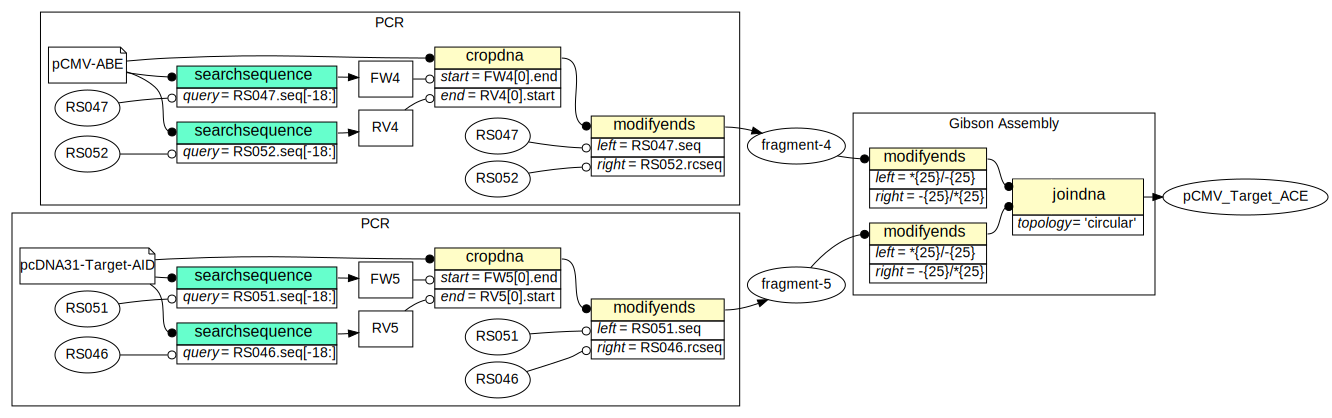

In [10]:
#Visualize the operational process chart of pCMV-Target-ACE.
flow = visualizeflow(pCMV_Target_ACE, alias_dict={"fragment4":"fragment-4", "fragment5":"fragment-5", "pcDNA31_Target_AID": "pcDNA31-Target-AID", "pCMV_ABE": "pCMV-ABE", "pCMV_Target_AID": "pCMV-Target-AID"})
flow.render("output/pCMV_Target_ACE_construction")
flow

In [11]:
pCMV_Target_ACE.outputgbk("output/pCMV-Target-ACE.gbk")

In [12]:
quine(pCMV_Target_ACE, execution=True)

True

In [13]:
quine(pCMV_Target_ACE, process_description=True)

1. A backbone fragment was amplified from pCMV-ABE7.10 using the primer set RS047/RS052.
2. The C-terminus region of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using the primer set RS051/RS046.
3. The two fragments were assembled by Gibson Assembly reaction.
